# Implementación de control PID

El control **PID (Proporcional, Integral, Derivativo)** es un algoritmo utilizado para mantener una variable bajo control ajustando la salida de un sistema según un "error", es decir, la diferencia entre un valor deseado (*setpoint*) y el valor actual (*feedback*). Matemáticamente, la salida del controlador PID se define como:

$$
u(t) = K_p \cdot e(t) + K_i \int e(t) \, dt + K_d \frac{d e(t)}{dt}
$$

Donde:
- $ u(t) $: Salida del controlador (valor aplicado al sistema).
- $ e(t) = \text{setpoint} - \text{feedback} $: Error en el tiempo $t$.
- $ K_p $: Ganancia proporcional.
- $ K_i $: Ganancia integral.
- $ K_d $: Ganancia derivativa.

Es decir:

- **Proporcional ($K_p$)**: Responde al error actual.
- **Integral ($K_i$)**: Responde al error acumulado en el tiempo.
- **Derivativo ($K_d$)**: Responde a la rapidez del cambio del error.

## 1. Término Proporcional ($K_p \cdot e(t)$)

Es la parte del controlador que ajusta la salida en proporción directa al error actual. Si el error es grande, la corrección será grande; si el error es pequeño, la corrección será pequeña. Este término corrige el error de manera inmediata, intentando acercar el sistema al setpoint. Sin embargo, no elimina completamente el error (puede dejar un error estacionario).

### Ejemplo:

En un robot siguelínea, si el robot está desviado 10 unidades a la derecha, el controlador proporcional aplicará una corrección proporcional a este desvío. Definimos el **error** ($e(t)$) como la diferencia entre el **setpoint** (valor deseado) y el valor actual. La salida proporcional será simplemente:

$$
u(t) = K_p \cdot e(t)
$$

Si $ K_p = 2 $, la corrección será:

$$ u(t) = 2 \cdot 10 = 20 $$

Esta corrección mueve al robot hacia el centro de la línea.


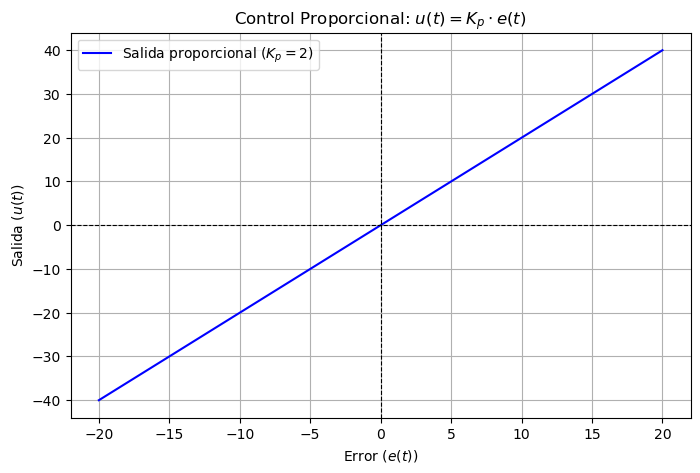

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
K_p = 2  # Ganancia proporcional
error = np.linspace(-20, 20, 100)  # Rango de errores desde -20 a 20

# Salida proporcional
u_t = K_p * error

# Graficar la salida proporcional
plt.figure(figsize=(8, 5))
plt.plot(error, u_t, label=f'Salida proporcional ($K_p = {K_p}$)', color='b')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Etiquetas y título
plt.title("Control Proporcional: $u(t) = K_p \\cdot e(t)$")
plt.xlabel("Error ($e(t)$)")
plt.ylabel("Salida ($u(t)$)")
plt.legend()
plt.grid()
plt.show()


## 2. Término Integral ($K_i \int e(t) \, dt$)

Es la acumulación del error a lo largo del tiempo. Si el error persiste, aunque sea pequeño, el término integral lo incrementa hasta eliminarlo. Elimina el error estacionario causado por el término proporcional. Es útil para sistemas donde el error no desaparece solo con el control proporcional.

### Ejemplo:

Si el robot siempre queda ligeramente desviado (error constante de $e(t) = 2$), la integral suma este error:

$$ \int e(t) \, dt = 2 \cdot t $$

Con $ K_i = 1 $, la corrección aumentará lentamente con el tiempo, hasta eliminar completamente el error.

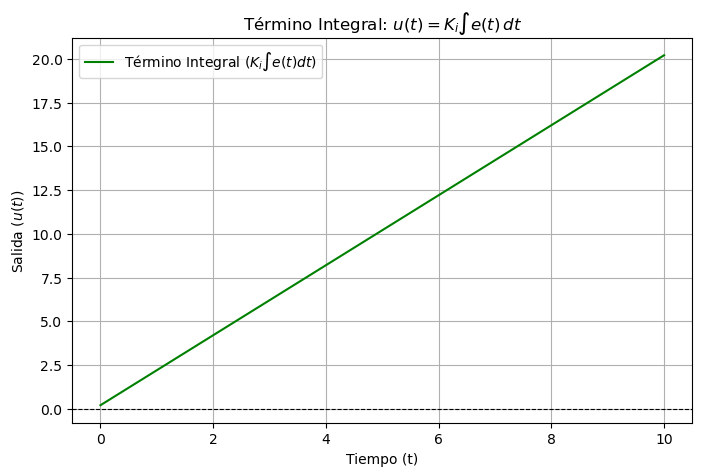

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
K_i = 1  # Ganancia integral
t = np.linspace(0, 10, 100)  # Tiempo desde 0 a 10 segundos
error = 2 * np.ones_like(t)  # Error constante e(t) = 2

# Aproximación de la integral como suma acumulativa
dt = t[1] - t[0]  # Paso de tiempo
integral_e = np.cumsum(error) * dt  # Suma acumulativa
u_t = K_i * integral_e  # Salida integral

# Graficar el término integral
plt.figure(figsize=(8, 5))
plt.plot(t, u_t, label=r'Término Integral ($K_i \int e(t) dt$)', color='g')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Etiquetas y título
plt.title(r"Término Integral: $u(t) = K_i \int e(t) \, dt$")
plt.xlabel("Tiempo (t)")
plt.ylabel("Salida ($u(t)$)")
plt.legend()
plt.grid()
plt.show()

## 3. Término Derivativo ($K_d \frac{d e(t)}{dt}$)

Es la tasa de cambio del error. Responde a la rapidez con la que el error cambia, actuando como un "amortiguador" que evita que el sistema reaccione demasiado rápido (y oscile). Reduce oscilaciones y anticipa el comportamiento futuro del error, estabilizando el sistema.

### Ejemplo:

Si el robot está acercándose rápidamente al centro de la línea (error decreciendo), la derivada será negativa. Esto reduce la corrección, evitando que el robot sobrepase la línea. El término derivativo calcula la tasa de cambio del error, lo que permite anticipar la tendencia del sistema. Se define como:

$$
u(t) = K_d \frac{d e(t)}{dt}
$$

- $ K_d $: ganancia derivativa.
- $ e(t) $: error en función del tiempo.
- $ \frac{d e(t)}{dt} $: derivada del error respecto al tiempo.

En Python, podemos aproximar la derivada utilizando diferencias finitas. Para este ejemplo, consideremos un error que varía con el tiempo, por ejemplo:

$$
e(t) = 10 \sin(t)
$$

La derivada del error será calculada como:

$$
\frac{d e(t)}{dt} \approx \frac{e(t + \Delta t) - e(t)}{\Delta t}
$$

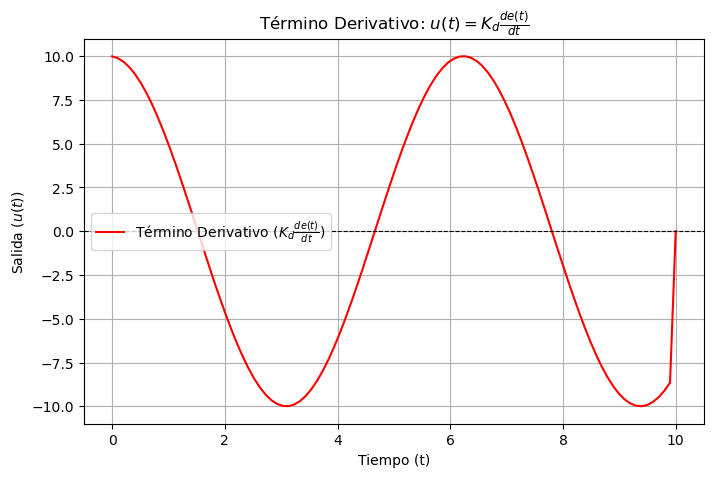

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
K_d = 1  # Ganancia derivativa
t = np.linspace(0, 10, 100)  # Tiempo desde 0 a 10 segundos
error = 10 * np.sin(t)  # Error variable e(t) = 10 * sin(t)

# Aproximación de la derivada utilizando diferencias finitas
dt = t[1] - t[0]  # Paso de tiempo
derivative_e = np.diff(error) / dt  # Diferencias finitas para derivada
derivative_e = np.append(derivative_e, 0)  # Ajuste para mantener la longitud

# Salida derivativa
u_t = K_d * derivative_e

# Graficar el término derivativo
plt.figure(figsize=(8, 5))
plt.plot(t, u_t, label=r'Término Derivativo ($K_d \frac{d e(t)}{dt}$)', color='r')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Etiquetas y título
plt.title(r"Término Derivativo: $u(t) = K_d \frac{d e(t)}{dt}$")
plt.xlabel("Tiempo (t)")
plt.ylabel("Salida ($u(t)$)")
plt.legend()
plt.grid()
plt.show()

## **Fórmula Completa del PID:**
$$
u(t) = K_p \cdot e(t) + K_i \int e(t) \, dt + K_d \frac{d e(t)}{dt}
$$

### **Desglose:**
1. $K_p \cdot e(t)$: Aplica una corrección proporcional al error actual.
2. $K_i \int e(t) \, dt$: Acumula errores pasados y corrige desviaciones persistentes.
3. $K_d \frac{d e(t)}{dt}$: Reacciona a la velocidad del cambio del error, amortiguando oscilaciones.

### **Ejemplo Completo:**
Supongamos:
- $e(t) = 5$,
- $e'(t) = -1$ (el error está disminuyendo),
- $\int e(t) \, dt = 10$ (error acumulado),
- $K_p = 2$, $K_i = 0.5$, $K_d = 1$.

El cálculo sería:
$$
u(t) = (2 \cdot 5) + (0.5 \cdot 10) + (1 \cdot -1)
$$
$$
u(t) = 10 + 5 - 1 = 14
$$

Esto significa que el controlador aplicará una corrección de 14 unidades para reducir el error.

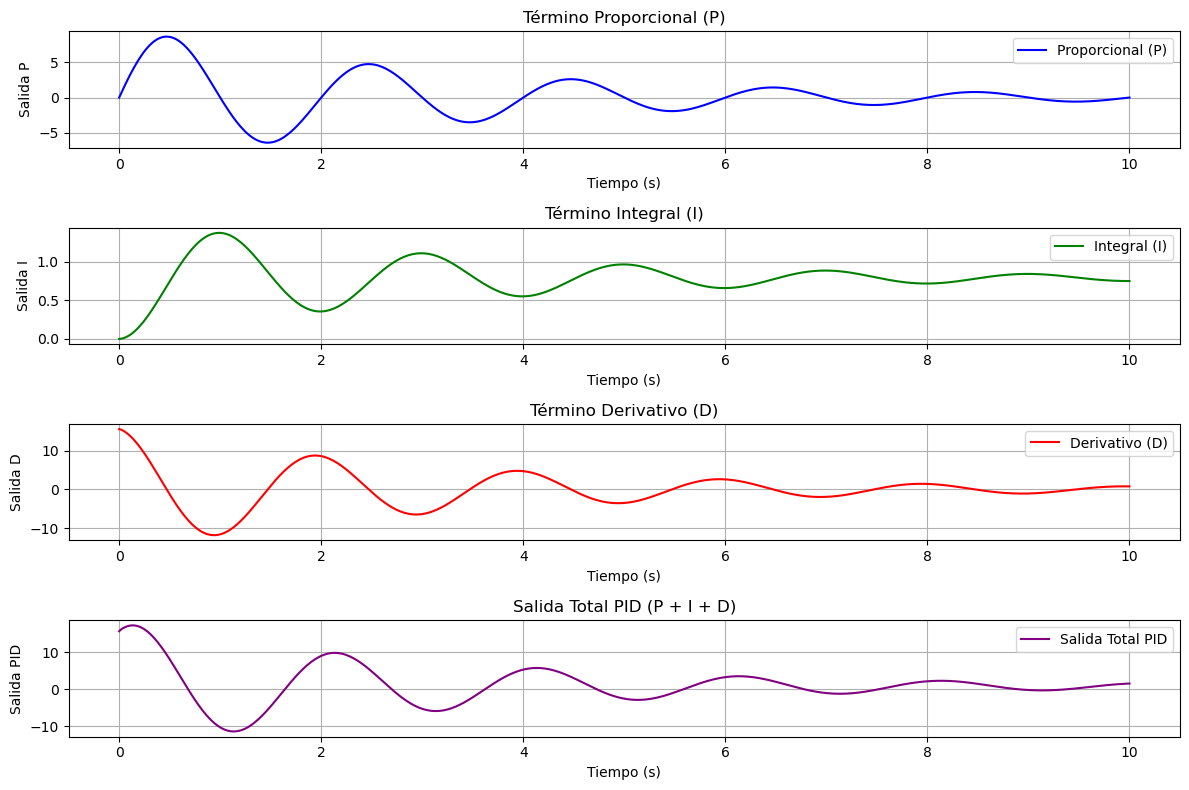

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar el error en función del tiempo
def error_function(t):
    return 5 * np.exp(-0.3 * t) * np.sin(2 * np.pi * 0.5 * t)

# Función para calcular el término proporcional
def proportional(Kp, error):
    return Kp * error

# Función para calcular el término integral
def integral(Ki, error, t):
    dt = t[1] - t[0]  # Intervalo de tiempo
    return Ki * np.cumsum(error) * dt  # Suma acumulativa para la integral

# Función para calcular el término derivativo
def derivative(Kd, error, t):
    return Kd * np.gradient(error, t)  # Derivada usando gradiente numérico

# Función para calcular el PID completo
def pid(Kp, Ki, Kd, error, t):
    P = proportional(Kp, error)
    I = integral(Ki, error, t)
    D = derivative(Kd, error, t)
    return P, I, D, P + I + D

# Configuración de parámetros
Kp = 2  # Ganancia proporcional
Ki = 0.5  # Ganancia integral
Kd = 1  # Ganancia derivativa

# Tiempo y error
t = np.linspace(0, 10, 500)  # Tiempo de 0 a 10 segundos
error = error_function(t)  # Error en función del tiempo

# Cálculo de los términos
P_term = proportional(Kp, error)
I_term = integral(Ki, error, t)
D_term = derivative(Kd, error, t)
P, I, D, PID_output = pid(Kp, Ki, Kd, error, t)

# Graficar los resultados
def plot_pid(P, I, D, PID_output, t):
    plt.figure(figsize=(12, 8))
    
    # Término Proporcional
    plt.subplot(4, 1, 1)
    plt.plot(t, P, label="Proporcional (P)", color='blue')
    plt.title("Término Proporcional (P)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Salida P")
    plt.grid()
    plt.legend()
    
    # Término Integral
    plt.subplot(4, 1, 2)
    plt.plot(t, I, label="Integral (I)", color='green')
    plt.title("Término Integral (I)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Salida I")
    plt.grid()
    plt.legend()
    
    # Término Derivativo
    plt.subplot(4, 1, 3)
    plt.plot(t, D, label="Derivativo (D)", color='red')
    plt.title("Término Derivativo (D)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Salida D")
    plt.grid()
    plt.legend()
    
    # Salida PID Total
    plt.subplot(4, 1, 4)
    plt.plot(t, PID_output, label="Salida Total PID", color='purple')
    plt.title("Salida Total PID (P + I + D)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Salida PID")
    plt.grid()
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Graficar términos y PID
plot_pid(P_term, I_term, D_term, PID_output, t)

## Control PID en Arduino

Este ejemplo está diseñado para controlar un robot sigue-líneas que utiliza tres sensores IR y dos motores (tracción y servo de dirección).

### Concepto del Control

- **Sensores IR:** Los tres sensores IR detectan la posición relativa del robot respecto a la línea.
  - Valores típicos: `0` (negro, sobre la línea) y `1` (blanco, fuera de la línea).
- **Error:** Se calcula a partir de la posición de la línea respecto al robot.
  - Ejemplo: 
    - Si el sensor izquierdo detecta la línea, el error puede ser `-1`.
    - Si el central detecta la línea, el error es `0`.
    - Si el derecho detecta la línea, el error es `1`.
- **Salida del PID:** Ajusta el ángulo del servo de dirección para mantener el robot sobre la línea.

### Configuración de Hardware

1. **Componentes:**
   - 3 sensores IR conectados a pines digitales (ej.: `A0`, `A1`, `A2`).
   - Un motor de tracción controlado por un controlador de motores (ej.: L298N).
   - Un servo motor para la dirección conectado a un pin PWM (ej.: `D9`).

2. **Conexiones:**
   - Los sensores IR detectan la línea y envían sus valores al Arduino.
   - El motor de tracción se controla con una señal PWM.
   - El servo motor ajusta el ángulo de dirección.

### Código en Arduino

In [ ]:
#include <Servo.h>

const int sensorIzquierdo = A0;
const int sensorCentral = A1;
const int sensorDerecho = A2;
const int motorTraccion = 5;

const int velocidadBase = 150;

Servo servoDireccion;

// Parámetros del PID
float Kp = 1.5;   // Ganancia proporcional
float Ki = 0.1;   // Ganancia integral
float Kd = 0.5;   // Ganancia derivativa

// Variables del PID
float error = 0, errorPrevio = 0;
float integral = 0, derivativo = 0;
float salidaPID = 0;

void setup() {

  pinMode(sensorIzquierdo, INPUT);
  pinMode(sensorCentral, INPUT);
  pinMode(sensorDerecho, INPUT);

  servoDireccion.attach(9);
  pinMode(motorTraccion, OUTPUT);

  servoDireccion.write(90);
}

void loop() {

  int izquierda = digitalRead(sensorIzquierdo);
  int central = digitalRead(sensorCentral);
  int derecha = digitalRead(sensorDerecho);

  // Calcular el error basado en la posición de la línea
  if (izquierda == 0) {
    error = -1;
  } else if (central == 0) {
    error = 0;
  } else if (derecha == 0) {
    error = 1;
  } else {
    error = 0;  // Ningún sensor detecta la línea
  }

  // Calcular términos del PID
  integral += error;
  derivativo = error - errorPrevio;
  salidaPID = Kp * error + Ki * integral + Kd * derivativo;

  // Limitar la salida del PID
  salidaPID = constrain(salidaPID, -45, 45);

  // Ajustar el ángulo del servo
  int anguloServo = 90 + salidaPID;  // 90 es la posición central
  servoDireccion.write(constrain(anguloServo, 45, 135));  // Limitar ángulo del servo

  // Ajustar la velocidad del motor de tracción
  analogWrite(motorTraccion, velocidadBase);

  // Actualizar el error previo
  errorPrevio = error;

  // Pequeño retardo
  delay(10);
}

Los sensores detectan la posición de la línea, y se interpreta el error como `-1`, `0` o `1` según la posición de la línea. Luego, se calcula una corrección basada en: 

- `P:`error actual.
- `I:` suma acumulada de errores.
- `D:` cambio del error.

La salida PID ajusta el ángulo del servo para corregir la dirección, limitándolo entre `45°` y `135°`. Además, se mantiene una velocidad constante para el movimiento.

### Ajustes de las constantes del PID

- $ K_p $: Incrementa para una respuesta más agresiva.
- $ K_i $: Incrementa si persiste un error constante.
- $ K_d $: Incrementa para reducir oscilaciones.